# Environment Sanity Check #

Click the _Runtime_ dropdown at the top of the page, then _Change Runtime Type_ and confirm the instance type is _GPU_.

You can check the output of `!nvidia-smi` to check which GPU you have.  Please uncomment the cell below if you'd like to do that.  Currently, RAPIDS runs on all available Colab GPU instances.

In [1]:
 !nvidia-smi

Wed Apr 10 13:33:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Setup:
This set up script:

1. Checks to make sure that the GPU is RAPIDS compatible
1. Installs the **current stable version** of RAPIDSAI's core libraries using pip, which are:
  1. cuDF
  1. cuML
  1. cuGraph
  1. cuSpatial
  1. cuxFilter
  1. cuCIM
  1. xgboost

**This will complete in about 5-6 minutes**

If you require installing the **nightly** releases of RAPIDSAI, please use the [RAPIDS Conda Colab Template notebook](https://colab.research.google.com/drive/1TAAi_szMfWqRfHVfjGSqnGVLr_ztzUM9) and use the nightly parameter option when running the RAPIDS installation cell.


In [2]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py



Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 460, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 460 (delta 131), reused 124 (delta 91), pack-reused 269
Receiving objects: 100% (460/460), 126.19 KiB | 2.38 MiB/s, done.
Resolving deltas: 100% (233/233), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.0 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has a Tesla T4 GPU!
We will install the latest stable RAPIDS via pip 24.2.*!  Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.7/464.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 GB 790.

# RAPIDS is now installed on Colab.  
You can copy your code into the cells below or use the below to validate your RAPIDS installation and version.  
# Enjoy!

In [3]:
import cudf
print(cudf.__version__)

24.02.02


In [ ]:
import cuml
cuml.__version__

'23.10.00'

In [ ]:
import cugraph
cugraph.__version__

'23.10.00'

In [ ]:
import cuspatial
cuspatial.__version__

'23.10.00'

In [ ]:
import cuxfilter
cuxfilter.__version__

'23.10.00'

# Next Steps #

For an overview of how you can access and work with your own datasets in Colab, check out [this guide](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92).

For more RAPIDS examples, check out our RAPIDS notebooks repos:
1. https://github.com/rapidsai/notebooks
2. https://github.com/rapidsai/notebooks-contrib

In [ ]:
!pip install --upgrade pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 38.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.2.2 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.2.1 which is incompatible.
dask-cuda 24.2.0 requires pandas<1.6.0.dev0,>=1.3, but you have pandas 2.2.1 which is incompatible.
dask-cudf-cu12 24.2.2 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.1 which is incompatible.


# EDA

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


/usr/local/lib/python3.10/dist-packages/cudf/core/dataframe.py:5106: FutureWarning: `datetime_is_numeric` is deprecated. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cudf/core/series.py:3319: FutureWarning: `datetime_is_numeric` is deprecated and will be removed in a future release. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  warnings.warn(


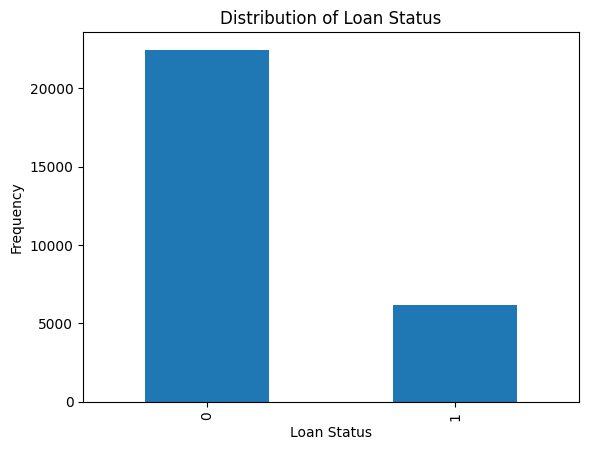

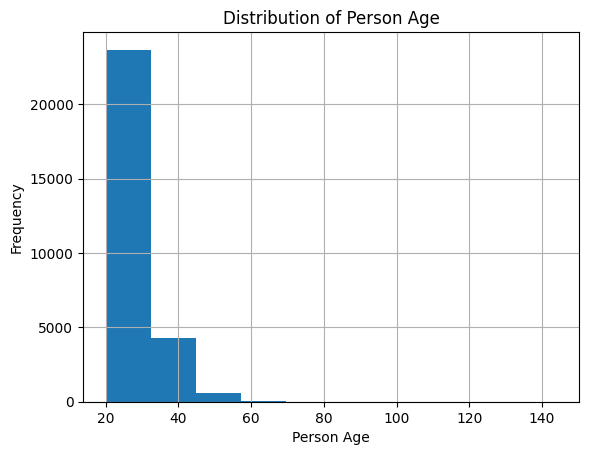

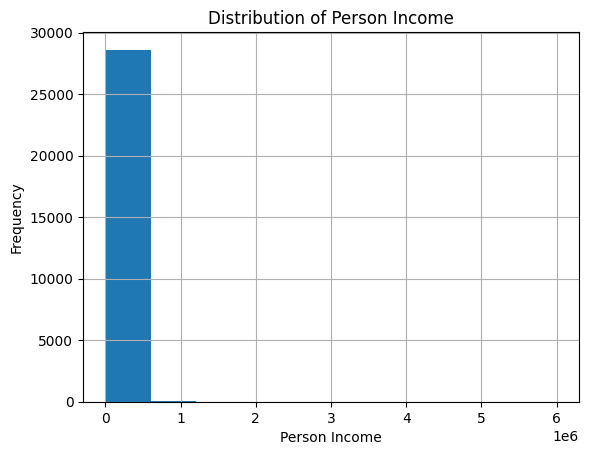

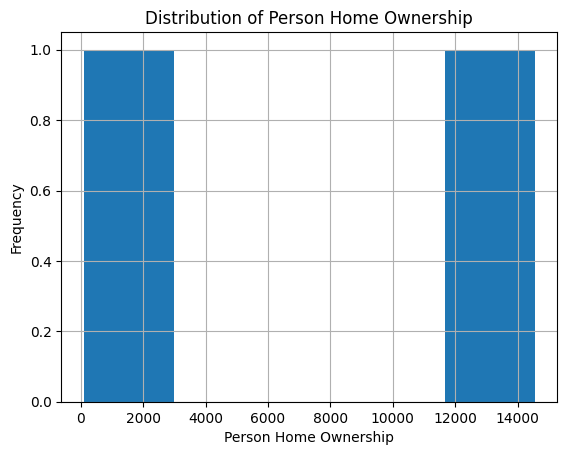

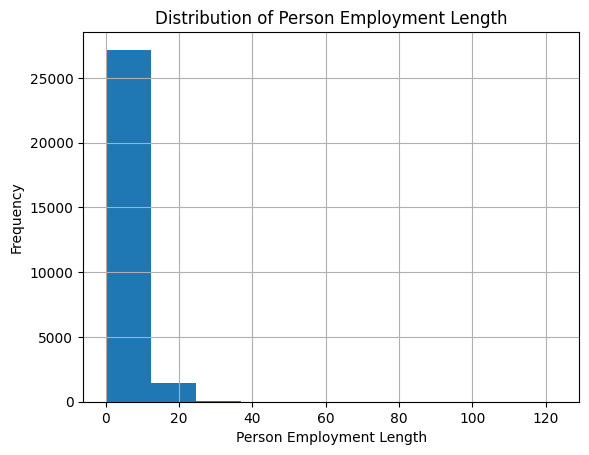

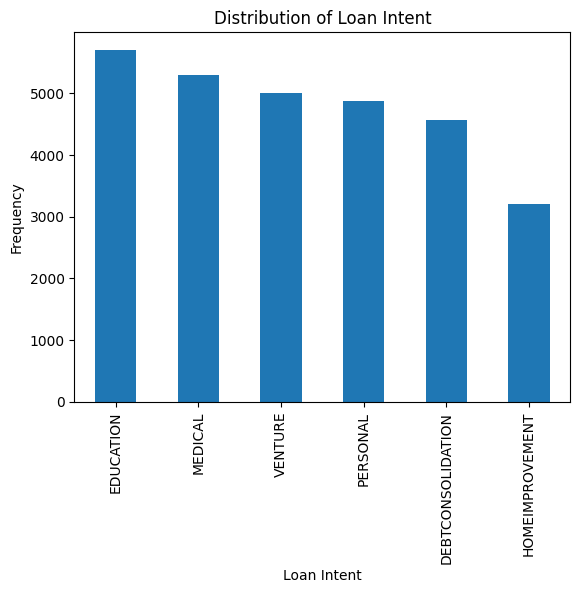

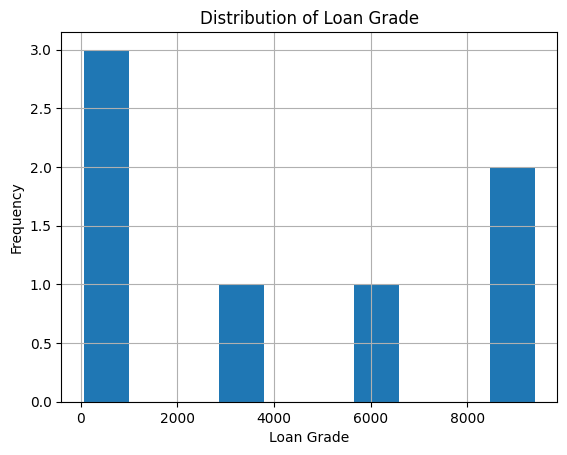

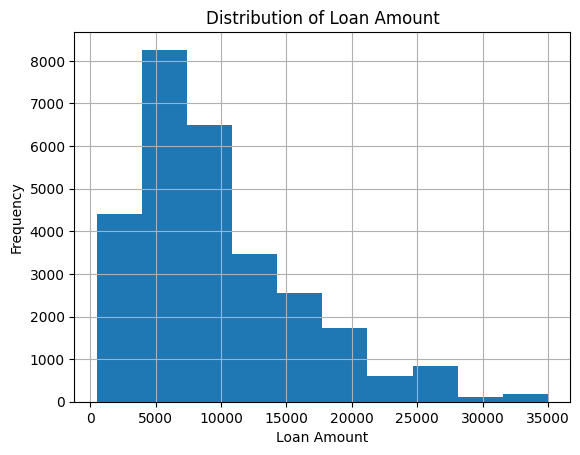

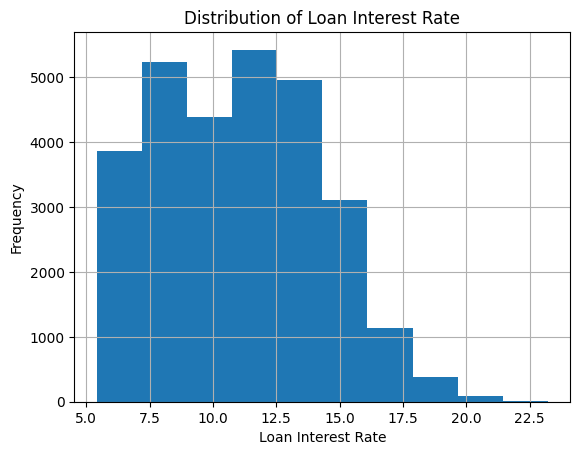

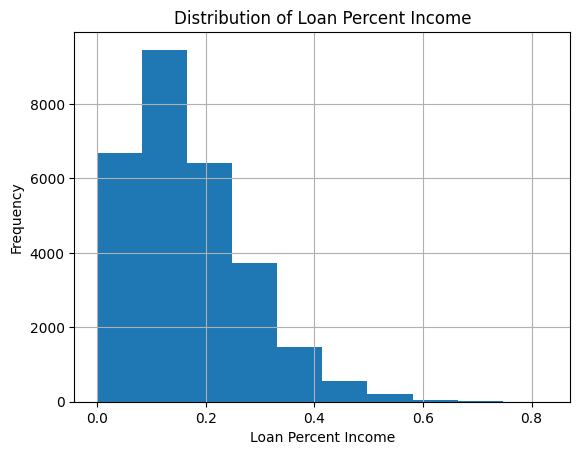

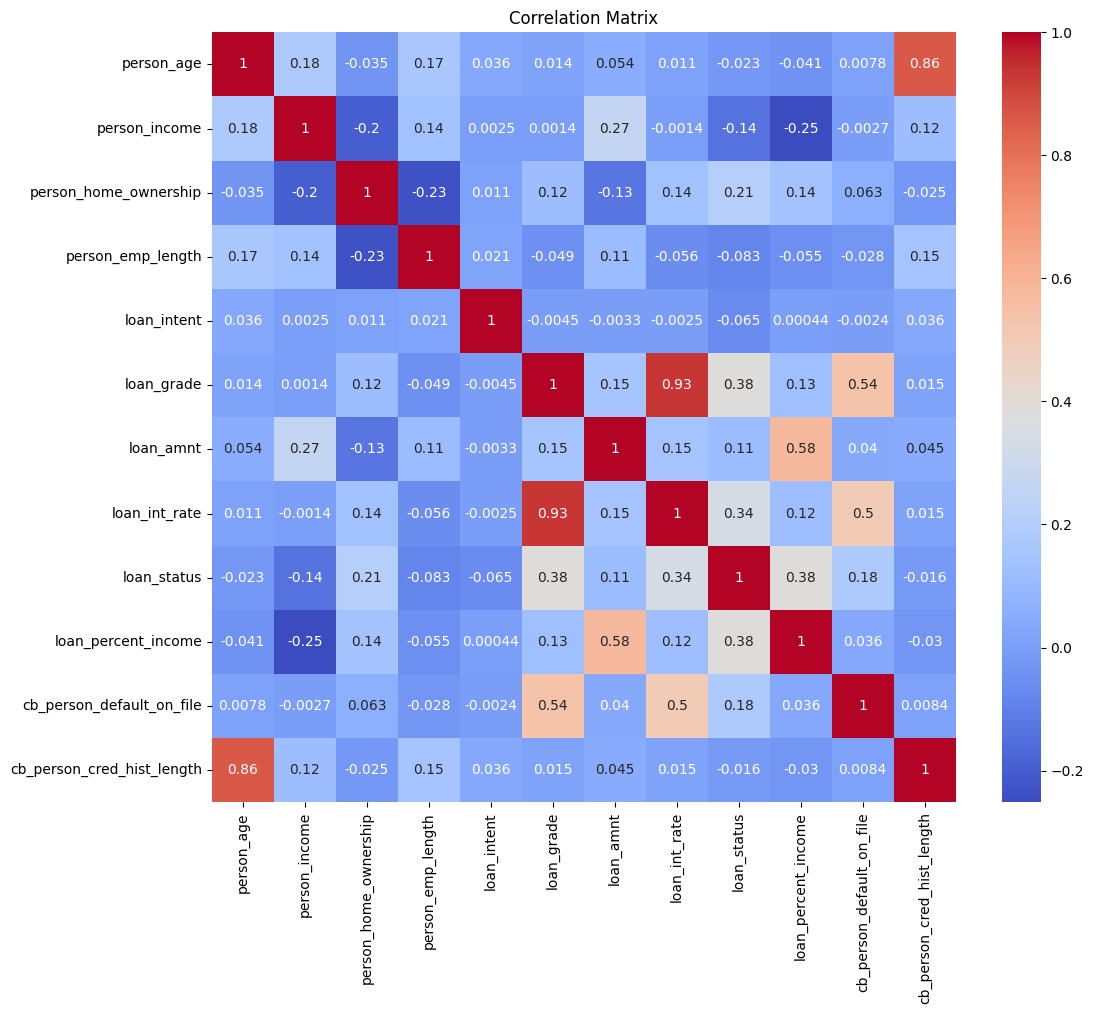

loan_intent                   1.322021e-32
cb_person_default_on_file    1.375125e-171
person_home_ownership         0.000000e+00
loan_grade                    0.000000e+00
dtype: float64
cb_person_cred_hist_length     8.088412e-03
person_age                     7.851498e-05
person_emp_length              1.392110e-44
loan_amnt                      8.326532e-83
person_income                 3.537876e-125
loan_int_rate                  0.000000e+00
loan_percent_income            0.000000e+00
dtype: float64


In [9]:
import cudf
import numpy as np
import pandas as pd  # Import pandas library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

# Read the data using cudf
df = cudf.read_csv('credit_risk_dataset.csv')

# Drop rows with null values
df = df.dropna()

# Basic exploration
print(df.head())
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe())

# Visualize loan status distribution
loan_status_counts = df['loan_status'].value_counts().to_pandas()
loan_status_counts.plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Status')
plt.show()

# Visualize person age distribution
person_age_hist = df['person_age'].to_pandas()
person_age_hist.hist()
plt.xlabel('Person Age')
plt.ylabel('Frequency')
plt.title('Distribution of Person Age')
plt.show()

person_income_hist= df['person_income'].to_pandas()
person_income_hist.hist()
plt.xlabel('Person Income')
plt.ylabel('Frequency')
plt.title('Distribution of Person Income')
plt.show()

person_home_hist= df['person_home_ownership'].value_counts().to_pandas()
person_home_hist.hist()
plt.xlabel('Person Home Ownership')
plt.ylabel('Frequency')
plt.title('Distribution of Person Home Ownership')
plt.show()

person_emp_hist= df['person_emp_length'].to_pandas()
person_emp_hist.hist()
plt.xlabel('Person Employment Length')
plt.ylabel('Frequency')
plt.title('Distribution of Person Employment Length')
plt.show()

# Visualize loan intent distribution
loan_intent_counts = df['loan_intent'].value_counts().to_pandas()
loan_intent_counts.plot(kind='bar')
plt.xlabel('Loan Intent')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Intent')
plt.show()

loan_grade_hist=df['loan_grade'].value_counts().to_pandas()
loan_grade_hist.hist()
plt.xlabel('Loan Grade')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Grade')
plt.show()

df['loan_amnt'].to_pandas().hist()
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.show()

df['loan_int_rate'].to_pandas().hist()
plt.xlabel('Loan Interest Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Interest Rate')
plt.show()

df['loan_percent_income'].to_pandas().hist()
plt.xlabel('Loan Percent Income')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Percent Income')
plt.show()


# Label encoding categorical variables
le = LabelEncoder()
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'].to_numpy())
df['loan_intent'] = le.fit_transform(df['loan_intent'].to_numpy())
df['loan_grade'] = le.fit_transform(df['loan_grade'].to_numpy())
df['cb_person_default_on_file'] = le.fit_transform(df['cb_person_default_on_file'].to_numpy())

# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr.to_pandas(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature selection using chi-square test
cat_vars = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
chi_scores = chi2(df[cat_vars].to_pandas(), df['loan_status'].to_pandas())
p_values = pd.Series(chi_scores[1], index=cat_vars)
p_values.sort_values(ascending=False, inplace=True)
print(p_values)

# Feature selection using ANOVA F-test
num_vars = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
f_scores = f_classif(df[num_vars].to_pandas(), df['loan_status'].to_pandas())
p_values = pd.Series(f_scores[1], index=num_vars)
p_values.sort_values(ascending=False, inplace=True)
print(p_values)


# Model Building

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7aedef5db760>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1014, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1184, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 113, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    s

KNN: 0.89
Logistic Regression: 0.86
Support Vector Machines: 0.91
Decision Trees: 0.89
Random Forest: 0.93


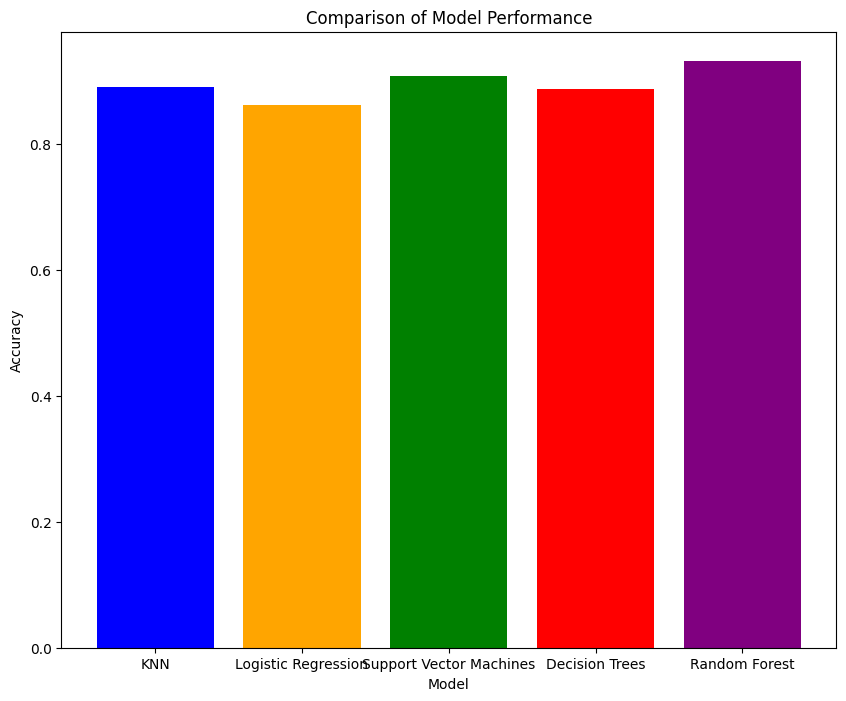

In [ ]:
import torch
import cudf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import zscore

# Read the data using cudf
df = cudf.read_csv('credit_risk_dataset.csv')
df = df.dropna()

# Split data into input and output variables
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_num = X_train.drop(['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], axis=1)
X_train_num = scaler.fit_transform(X_train_num.to_numpy())  # Convert to NumPy array
X_test_num = X_test.drop(['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], axis=1)
X_test_num = scaler.transform(X_test_num.to_numpy())  # Convert to NumPy array

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False)
X_train_cat = X_train[['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']]
X_train_cat = encoder.fit_transform(X_train_cat.to_pandas())  # Convert to Pandas DataFrame
X_test_cat = X_test[['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']]
X_test_cat = encoder.transform(X_test_cat.to_pandas())  # Convert to Pandas DataFrame

# Concatenate numerical and categorical features
X_train = np.concatenate((X_train_num, X_train_cat), axis=1)
X_test = np.concatenate((X_test_num, X_test_cat), axis=1)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).cuda()
y_train = torch.tensor(y_train.values, dtype=torch.float32).cuda()
X_test = torch.tensor(X_test, dtype=torch.float32).cuda()
y_test = torch.tensor(y_test.values, dtype=torch.float32).cuda()

# Define models
models = [
    KNeighborsClassifier(),
    LogisticRegression(max_iter=10000),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

model_names = ['KNN', 'Logistic Regression', 'Support Vector Machines', 'Decision Trees', 'Random Forest']
accuracies = []

# Train and evaluate models
for model in models:
    model.fit(X_train.cpu().numpy(), y_train.cpu().numpy())
    accuracy = accuracy_score(y_test.cpu().numpy(), model.predict(X_test.cpu().numpy()))
    accuracies.append(accuracy)

results = dict(zip(model_names, accuracies))

# Print results
for name, acc in results.items():
    print(f'{name}: {acc:.2f}')

# Plot results
plt.figure(figsize=(10, 8))
plt.bar(results.keys(), results.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Performance')
plt.show()
